<a href="https://colab.research.google.com/github/SamiraHabib/Fake_News/blob/main/FakeNews_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Entendendo o dataset**

  Os dados utilizados neste notebook foram coletados através de chamadas para a API [Veedoo](https://api.veedoo.io/), e são referentes ao banco de dados do site [EU vs Desinfo](https://euvsdisinfo.eu/disinformation-cases/) que, por sua vez é baseado em análises do _East Stratcom Task Force_.

A _East Stratcom Task Force_ é uma organização para explicar melhor os valores, interesses e políticas da União Euripeia nos países parceiros da europa oriental. E trabalha em parceria com instituições e delegações da União Europeia nos países da Parceria Oriental, na Ásia Central e na Federação da Rússia.
O trabalho da task force consiste em conscientizar sobre o impacto negativo da desinformação que se origina em fontes pró Governo Russo e é disseminada na europa oriental e além.

  Este banco de dados possui uma série de avaliações de notícias que podem
fornecer uma representação parcial, distorcida ou falsa da realidade. Por se apresentarem como notícias, é possível inferir que estas tem a intenção de causar desinformação, desta forma, podem ser englobadas como _Fake News_ na definição do conceito utilizado neste trabalho.

Desta forma, o conteúdo deste banco de dados é formado, de cada entrada sendo avaliações de _Fake News_ feitas pelo EU vs Desinfo sobre acusações de desinformação em notícias que apoiam o governo da Russia (_Kremlin_).

In [ ]:
import pandas as pd

In [ ]:
files = pd.read_csv('/content/data.csv')

In [ ]:
files.head()

,Unnamed: 0,claims_id,claim_published,first_appearance,review_id,is_part_of,claim_reviewed,review_published,review_name,html_text,text,issue_id,keyword_id,keyword_name,country_id,country_name,appearances,has_parts,creative_work_id,type,url,author,claim,web_archive_url,abstract,in_language,start_time,end_time,organization_id,location,organization_name,image_id,image_type,image_content_url,language_id,language_name,language_code
0,0,/claims/100,2019-12-13T00:00:00+00:00,/news_articles/598,/claim_reviews/100,/issues/177,Ukraine has put itself in a situation when ext...,2019-12-16T00:00:00+00:00,Normandy summit results: the EU plays on Russi...,<p>This article misrepresents the actual Germa...,This article misrepresents the actual German a...,/issues/177,"['/keywords/61', '/keywords/76', '/keywords/77...","['Abandoned Ukraine', 'Angela Merkel', 'Emmanu...","['/countries/4', '/countries/9', '/countries/1...","['Russia', 'Ukraine', 'The West', 'EU', 'Germa...",/news_articles/598,"['/claims/75', '/claims/79', '/claims/80', '/c...",/news_articles/598,http://schema.org/NewsArticle,https://sputnik.by/columnists/20191213/1043442...,/organizations/262,/claims/100,https://web.archive.org/web/20191213153206/htt...,"На нынешней же встрече Зеленский (который, кст...",/languages/3,NaN,NaN,/organizations/262,/countries/55,sputnik.by // lifenews.ru,/image_objects/23,http://schema.org/ImageObject,https://api.veedoo.io/images/5e3150bc27830_2fd...,/languages/3,Russian,rus
1,1,/claims/1000,2019-09-26T00:00:00+00:00,/news_articles/1835,/claim_reviews/1000,/issues/166,Regardless who was behind the recent attack on...,2019-09-27T00:00:00+00:00,The US benefits from the attack on the Saudi o...,<p>No evidence is provided to support the clai...,No evidence is provided to support the claim. ...,/issues/166,"['/keywords/4', '/keywords/10', '/keywords/111']","['Conspiracy', 'Terrorism', 'Donald Trump']","['/countries/2', '/countries/3', '/countries/58']","['Iran', 'United States', 'Saudi Arabia']",/news_articles/1835,"['/claims/934', '/claims/941', '/claims/942', ...",/news_articles/1835,http://schema.org/NewsArticle,https://southfront.org/who-really-benefits-fro...,/organizations/205,/claims/1000,https://web.archive.org/web/20190927121413/htt...,NaN,/languages/7,NaN,NaN,/organizations/205,NaN,southfront.org,NaN,NaN,NaN,/languages/7,English,eng
2,2,/claims/1002,2019-09-23T00:00:00+00:00,/media_objects/1837,/claim_reviews/1002,/issues/166,"Pilsudski is a historical figure, who establis...",2019-09-27T00:00:00+00:00,The Polish Legions of Pilsudski organized the ...,<p>This message is a part of the Kremlin’s pol...,This message is a part of the Kremlin’s policy...,/issues/166,"['/keywords/36', '/keywords/40', '/keywords/42...","['Genocide', 'WWII', 'Historical revisionism',...","['/countries/9', '/countries/24']","['Ukraine', 'Poland']",/media_objects/1837,"['/claims/934', '/claims/941', '/claims/942', ...",/media_objects/1837,http://schema.org/MediaObject,https://youtube.com/watch?v=9wvNBUNML3Q&t=250,/organizations/122,/claims/1002,https://web.archive.org/web/20190927133752/htt...,"Пилсудский фигура историческая, создавшая перв...",/languages/3,250.0,262.0,/organizations/122,/countries/4,Rossia 24,/image_objects/10,http://schema.org/ImageObject,https://api.veedoo.io/images/5e313449bca43_Ros...,/languages/3,Russian,rus
3,3,/claims/1003,2019-09-27T00:00:00+00:00,/media_objects/1838,/claim_reviews/1003,/issues/166,Washington (and to a large degree Brussels) ar...,2019-09-27T00:00:00+00:00,The West might use the Eastern Europeans as ca...,"<p><a href=""https://euvsdisinfo.eu/why-authori...","Conspiracy theory, presented without evidence....",/issues/166,"['/keywords/20', '/keywords/107', '/keywords/2...","['Russophobia', 'Encircling Russia', 'Operatio...","['/countries/3', '/countries/11', '/countries/...","['United States', 'The West', 'Czech Republic'...",/media_objects/1838,"['/claims/934', '/claims/941', '/claims/942', ...",/media_objects/1838,http://schema.or

##**Dicionário dos dados do dataset original:**

- 'Unnamed: 0': Número  único de identificação de cada linha de entrada, identico ao index.

- 'claims_id': Número único de identificação do alerta (Claim) de FakeNews.

- 'claim_published': Data e hora da publicação do alerta de FakeNews.

- 'first_appearance': A primeira ocorrência de um alerta de FakeNews pra uma notícia.

-  'review_id': Número único de identificação da avaliação da veracidade daquela notícia pelo EU vs Desinfo.

- 'is_part_of': Número único de identificação da _Issue_.

- 'claim_reviewed': Resumo da notícia original feita pelo EU vs Desinfo.

- 'review_published': Data e hora da públicação da avaliação da veracidade da notícia, ou seja, se ela é ou não fake news.

- 'review_name': Título da avaliação de Fake News.

- 'html_text': Conclusão da acusação de fake news feita pelo EU vs Desinfo ainda em formato html.

- 'text': Conclusão da acusação de fake news.

- 'issue_id': Número único de identificação da 'Issue'.

- 'keyword_id': Número único de identificação da palavra-chave.

- 'keyword_name': Nome da palavra-chave.

-'country_id': Número único de identificação dos países que são mensionados na notícia.

- 'country_name': Nome dos países que são mensionados na notícia.

- 'appearances': A primeira ocorrência de um alerta de FakeNews pra uma notícia.

- 'has_parts': Número único de identificação (id) de alertas de FakeNews feitas para aquela notícia.

- 'creative_work_id': Número único de identificação de um trabalho criativo, igual a coluna first_appearence.

- 'type': Tipo do conteúdo que foi avaliado pelo US vs Definfo, temos avaliações de [artigos](http://schema.org/NewsArticle) e [mídia](https://schema.org/MediaObject).

- 'url': Endereço web referente a cada notícia original.

- 'author': Número unico de identificação da instituição que produziu a notícia original.

- 'claim':  Número único de identificação do alerta de FakeNews.

- 'web_archive_url': Arquivo salvo (html) da página web da notícia original.

- 'abstract': Trecho aleatório da notícia original.

- 'in_language': Número único de identificação da lingua utilizada na reportagem original.

- 'start_time'
- 'end_time'

- 'organization_id': Número unico de identificação da instituição que produziu a notícia original

- 'location': Número unico de identificação do país que está localizado organização que produziu a notícia original.

- 'organization_name': Nome da instituição que produziu o conteúdo da notícia original.

- 'image_id': Número único de identificação da logo marca da organização da notícia original.

- 'image_type': Tipo do objeto de mídia classificado pelo schema, neste caso, objeto de imagem.

- 'image_content_url': Logo marca da organização da notícia original.

- 'language_id': Número único de identificação da lingua utilizada na reportagem original.

- 'language_name': Nome da lingua utilizada na reportagem.

- 'language_code': Representação do nome da língua pelas três primeiras letras.

**Descobrindo o que significa: Criando o dicionário**

- *Selecionamos colunas específicas em ingles (pra facilitar o entendimento do site original) e analisamos as informações das colunas*

In [ ]:
files[files['language_code'] == 'eng'].iloc[0]

Unnamed: 0                                                           1
claims_id                                                 /claims/1000
claim_published                              2019-09-26T00:00:00+00:00
first_appearance                                   /news_articles/1835
review_id                                          /claim_reviews/1000
is_part_of                                                 /issues/166
claim_reviewed       Regardless who was behind the recent attack on...
review_published                             2019-09-27T00:00:00+00:00
review_name          The US benefits from the attack on the Saudi o...
html_text            <p>No evidence is provided to support the clai...
text                 No evidence is provided to support the claim. ...
issue_id                                                   /issues/166
keyword_id            ['/keywords/4', '/keywords/10', '/keywords/111']
keyword_name               ['Conspiracy', 'Terrorism', 'Donald Trump']
countr

- *Acessamos a url da notícia original*

- *Acessamos também a avaliação da FakeNews no site da EU vs Desinfo, pesquisando por data e palavra chave diretamente no site, chegamos no  [link](https://euvsdisinfo.eu/report/the-us-benefits-from-the-attack-on-the-saudi-oil-facility) referente a notícia.*

##**Organizando os dados**

Como podemos perceber no **dicionário dos dados do dataset original**, a coluna 'Unnamed: 0' não é necessária pois trata-se de uma coluna com os indexes do CSV na transformação deste arquivo pra um DataFrame. 
Existem também, colunas com informações repetidas e, para facilitar o mapeamento, destacamos as que se repetem por tópicos de colunas iguais:

- is_part_of -  inssue_id

- appearances - creative_work_ID - fist apparence

- claim - claim_ID

- in_language - language_id

- organization_id - author

- html_text - text

Diante deste problema, vamos eliminar colunas duplicadas e inúteis. Mas vamos também melhorar a identificação dos dados do nosso DataFrame renomeando todas as colunas com uma melhor escolha semântica.



In [ ]:
del_cols = ['is_part_of', 'appearances', 'creative_work_id', 'claim', 'in_language', 'Unnamed: 0', 'html_text']
files.drop(del_cols, axis = 1, inplace = True)

In [ ]:
files.head()

,claims_id,claim_published,first_appearance,review_id,claim_reviewed,review_published,review_name,text,issue_id,keyword_id,keyword_name,country_id,country_name,has_parts,type,url,author,web_archive_url,abstract,start_time,end_time,organization_id,location,organization_name,image_id,image_type,image_content_url,language_id,language_name,language_code
0,/claims/100,2019-12-13T00:00:00+00:00,/news_articles/598,/claim_reviews/100,Ukraine has put itself in a situation when ext...,2019-12-16T00:00:00+00:00,Normandy summit results: the EU plays on Russi...,This article misrepresents the actual German a...,/issues/177,"['/keywords/61', '/keywords/76', '/keywords/77...","['Abandoned Ukraine', 'Angela Merkel', 'Emmanu...","['/countries/4', '/countries/9', '/countries/1...","['Russia', 'Ukraine', 'The West', 'EU', 'Germa...","['/claims/75', '/claims/79', '/claims/80', '/c...",http://schema.org/NewsArticle,https://sputnik.by/columnists/20191213/1043442...,/organizations/262,https://web.archive.org/web/20191213153206/htt...,"На нынешней же встрече Зеленский (который, кст...",NaN,NaN,/organizations/262,/countries/55,sputnik.by // lifenews.ru,/image_objects/23,http://schema.org/ImageObject,https://api.veedoo.io/images/5e3150bc27830_2fd...,/languages/3,Russian,rus
1,/claims/1000,2019-09-26T00:00:00+00:00,/news_articles/1835,/claim_reviews/1000,Regardless who was behind the recent attack on...,2019-09-27T00:00:00+00:00,The US benefits from the attack on the Saudi o...,No evidence is provided to support the claim. ...,/issues/166,"['/keywords/4', '/keywords/10', '/keywords/111']","['Conspiracy', 'Terrorism', 'Donald Trump']","['/countries/2', '/countries/3', '/countries/58']","['Iran', 'United States', 'Saudi Arabia']","['/claims/934', '/claims/941', '/claims/942', ...",http://schema.org/NewsArticle,https://southfront.org/who-really-benefits-fro...,/organizations/205,https://web.archive.org/web/20190927121413/htt...,NaN,NaN,NaN,/organizations/205,NaN,southfront.org,NaN,NaN,NaN,/languages/7,English,eng
2,/claims/1002,2019-09-23T00:00:00+00:00,/media_objects/1837,/claim_reviews/1002,"Pilsudski is a historical figure, who establis...",2019-09-27T00:00:00+00:00,The Polish Legions of Pilsudski organized the ...,This message is a part of the Kremlin’s policy...,/issues/166,"['/keywords/36', '/keywords/40', '/keywords/42...","['Genocide', 'WWII', 'Historical revisionism',...","['/countries/9', '/countries/24']","['Ukraine', 'Poland']","['/claims/934', '/claims/941', '/claims/942', ...",http://schema.org/MediaObject,https://youtube.com/watch?v=9wvNBUNML3Q&t=250,/organizations/122,https://web.archive.org/web/20190927133752/htt...,"Пилсудский фигура историческая, создавшая перв...",250.0,262.0,/organizations/122,/countries/4,Rossia 24,/image_objects/10,http://schema.org/ImageObject,https://api.veedoo.io/images/5e313449bca43_Ros...,/languages/3,Russian,rus
3,/claims/1003,2019-09-27T00:00:00+00:00,/media_objects/1838,/claim_reviews/1003,Washington (and to a large degree Brussels) ar...,2019-09-27T00:00:00+00:00,The West might use the Eastern Europeans as ca...,"Conspiracy theory, presented without evidence....",/issues/166,"['/keywords/20', '/keywords/107', '/keywords/2...","['Russophobia', 'Encircling Russia', 'Operatio...","['/countries/3', '/countries/11', '/countries/...","['United States', 'The West', 'Czech Republic'...","['/claims/934', '/claims/941', '/claims/942', ...",http://schema.org/MediaObject,https://www.fort-russ.com/2019/09/debunking-li...,/organizations/461,NaN,NaN,NaN,NaN,/organizations/461,NaN,fort-russ.com,NaN,NaN,NaN,/languages/7,English,eng
4,/claims/1004,2019-09-25T00:00:00+00:00,/news_articles/1839,/claim_reviews/1004,The beneficiary of the resolution of the Europ...,2019-09-27T00:00:00+00:00,The resolution of the European Parliament reli...,This message is part of the Kremlin’s policy o...,/issues/166,"['/keywords/30', '/keywords/40', '/keywords/41...","['European Parliament', 'WWII', 'Adolf Hitler'...","['/countries/4', '/countri

In [ ]:
files.columns

Index(['claims_id', 'claim_published', 'first_appearance', 'review_id',
       'claim_reviewed', 'review_published', 'review_name', 'text', 'issue_id',
       'keyword_id', 'keyword_name', 'country_id', 'country_name', 'has_parts',
       'type', 'url', 'author', 'web_archive_url', 'abstract', 'start_time',
       'end_time', 'organization_id', 'location', 'organization_name',
       'image_id', 'image_type', 'image_content_url', 'language_id',
       'language_name', 'language_code'],
      dtype='object')

**colunas renomeadas**

- 'claims_id': Número único de identificação do alerta (Claim) de FakeNews.

- 'claim_datetime': Data e hora da publicação do alerta de FakeNews.

- 'claim_first': A primeira ocorrência de um alerta de FakeNews pra uma notícia.

-  'review_id': Número único de identificação da avaliação da veracidade daquela notícia pelo EU vs Desinfo.

- 'review_resume': Resumo da notícia original feita pelo EU vs Desinfo.

 'review_datetime': Data e hora da públicação da avaliação da veracidade da notícia, ou seja, se ela é ou não fake news.

- 'review_title': Título da avaliação de Fake News.

- 'review_conclusion_html': Conclusão da acusação de fake news feita pelo EU vs Desinfo ainda em formato html.

- 'review_conclusion': Conclusão da acusação de fake news feita pelo EU vs Desinfo.

- 'issue_id': Número único de identificação da 'Issue'.

- 'news_keyword_id': Número único de identificação de palavras-chave que aparecem nas notícias originais.

- 'news_keyword_name': Nomes das palavras-chave que aparecem nas notícias originais.

-'news_countrys_id': Número único de identificação dos países que são mensionados nas notícias originais.

- 'news_countrys_name': Nome dos países que são mensionados nas notícias originais.

- 'claims_total': Número único de identificação (id) de alertas de FakeNews feitas para aquela notícia.

- 'news_type': Tipo do conteúdo que foi avaliado pelo US vs Definfo, temos avaliações de [artigos](http://schema.org/NewsArticle) e [mídia](https://schema.org/MediaObject).

- 'news_url': Endereço web referente a cada notícia original.

- 'news_organization_id': Número unico de identificação da instituição que produziu a notícia original.

- 'news_url_archive': Arquivo salvo (html) da página web da notícia original.

- 'news_part': Trecho aleatório da notícia original.

- 'review_start_time'

- 'review_end_time'

- 'news_organization_location': Número unico de identificação do país que está localizado organização que produziu a notícia original.

- 'news_organization_name': Nome da instituição que produziu o conteúdo da notícia original.

- 'news_logo_id': Número único de identificação da logo marca da organização da notícia original.

- 'news_logo_type': Tipo do objeto de mídia classificado pelo schema, neste caso, objeto de imagem.

- 'news_logo_url': Logo marca da organização da notícia original.

- 'news_language_id': Número único de identificação da lingua utilizada na reportagem original.

- 'news_language_name': Nome da lingua utilizada na reportagem.

- 'news_language_code': Representação do nome da língua pelas três primeiras letras.



In [ ]:
rename_columns = ['claims_id', 'claim_datetime', 'claim_first', 'review_id', 'review_resume', 
'review_datetime','review_title', 'review_conclusion','issue_id', 'news_keyword_id', 'news_keyword',
'news_countrys_id', 'news_countrys', 'claims_total', 'news_type', 'news_url', 'news_organization_id', 
'news_url_archive', 'news_part','review_start_time', 'review_end_time', 'news_organization_id', 
'news_organization_location','news_organization','news_logo_id','news_logo_type', 'news_logo_url', 
'news_language_id', 'news_language', 'news_language_code']

In [ ]:
files.columns = rename_columns

In [ ]:
files.head(2)

,claims_id,claim_datetime,claim_first,review_id,review_resume,review_datetime,review_title,review_conclusion,issue_id,news_keyword_id,news_keyword,news_countrys_id,news_countrys,claims_total,news_type,news_url,news_organization_id,news_url_archive,news_part,review_start_time,review_end_time,news_organization_id,news_organization_location,news_organization,news_logo_id,news_logo_type,news_logo_url,news_language_id,news_language,news_language_code
0,/claims/100,2019-12-13T00:00:00+00:00,/news_articles/598,/claim_reviews/100,Ukraine has put itself in a situation when ext...,2019-12-16T00:00:00+00:00,Normandy summit results: the EU plays on Russi...,This article misrepresents the actual German a...,/issues/177,"['/keywords/61', '/keywords/76', '/keywords/77...","['Abandoned Ukraine', 'Angela Merkel', 'Emmanu...","['/countries/4', '/countries/9', '/countries/1...","['Russia', 'Ukraine', 'The West', 'EU', 'Germa...","['/claims/75', '/claims/79', '/claims/80', '/c...",http://schema.org/NewsArticle,https://sputnik.by/columnists/20191213/1043442...,/organizations/262,https://web.archive.org/web/20191213153206/htt...,"На нынешней же встрече Зеленский (который, кст...",NaN,NaN,/organizations/262,/countries/55,sputnik.by // lifenews.ru,/image_objects/23,http://schema.org/ImageObject,https://api.veedoo.io/images/5e3150bc27830_2fd...,/languages/3,Russian,rus
1,/claims/1000,2019-09-26T00:00:00+00:00,/news_articles/1835,/claim_reviews/1000,Regardless who was behind the recent attack on...,2019-09-27T00:00:00+00:00,The US benefits from the attack on the Saudi o...,No evidence is provided to support the claim. ...,/issues/166,"['/keywords/4', '/keywords/10', '/keywords/111']","['Conspiracy', 'Terrorism', 'Donald Trump']","['/countries/2', '/countries/3', '/countries/58']","['Iran', 'United States', 'Saudi Arabia']","['/claims/934', '/claims/941', '/claims/942', ...",http://schema.org/NewsArticle,https://southfront.org/who-really-benefits-fro...,/organizations/205,https://web.archive.org/web/20190927121413/htt...,NaN,NaN,NaN,/organizations/205,NaN,southfront.org,NaN,NaN,NaN,/languages/7,English,eng


*Como cada entrada deste data frame é referente a revisão de um alerta de fake news de uma notícia, apenas o index para identificar cada revisão seria o suficiente, visto que os demais IDs já possuem sua coluna correspondente na tabela.
Diante disto, vamos separar os IDs em um DF separado, caso sejam necessários em consultas futuras e dropar do dataframe total.*

In [ ]:
id_list = []
for column in files.columns:
    if 'id' in column:
      id_list.append(column)
df_id = files[id_list]
df_total = files.drop(columns = id_list)

In [ ]:
print(f"Colunas do df total:{df_total.columns} \n\n Colunas do df id: {df_id.columns}")

Colunas do df total:Index(['claim_datetime', 'claim_first', 'review_resume', 'review_datetime',
       'review_title', 'review_conclusion', 'news_keyword', 'news_countrys',
       'claims_total', 'news_type', 'news_url', 'news_url_archive',
       'news_part', 'review_start_time', 'review_end_time',
       'news_organization_location', 'news_organization', 'news_logo_type',
       'news_logo_url', 'news_language', 'news_language_code'],
      dtype='object') 

 Colunas do df id: Index(['claims_id', 'review_id', 'issue_id', 'news_keyword_id',
       'news_countrys_id', 'news_organization_id', 'news_organization_id',
       'news_organization_id', 'news_organization_id', 'news_logo_id',
       'news_language_id'],
      dtype='object')


In [ ]:
df_total.head(2)

,claim_datetime,claim_first,review_resume,review_datetime,review_title,review_conclusion,news_keyword,news_countrys,claims_total,news_type,news_url,news_url_archive,news_part,review_start_time,review_end_time,news_organization_location,news_organization,news_logo_type,news_logo_url,news_language,news_language_code
0,2019-12-13T00:00:00+00:00,/news_articles/598,Ukraine has put itself in a situation when ext...,2019-12-16T00:00:00+00:00,Normandy summit results: the EU plays on Russi...,This article misrepresents the actual German a...,"['Abandoned Ukraine', 'Angela Merkel', 'Emmanu...","['Russia', 'Ukraine', 'The West', 'EU', 'Germa...","['/claims/75', '/claims/79', '/claims/80', '/c...",http://schema.org/NewsArticle,https://sputnik.by/columnists/20191213/1043442...,https://web.archive.org/web/20191213153206/htt...,"На нынешней же встрече Зеленский (который, кст...",NaN,NaN,/countries/55,sputnik.by // lifenews.ru,http://schema.org/ImageObject,https://api.veedoo.io/images/5e3150bc27830_2fd...,Russian,rus
1,2019-09-26T00:00:00+00:00,/news_articles/1835,Regardless who was behind the recent attack on...,2019-09-27T00:00:00+00:00,The US benefits from the attack on the Saudi o...,No evidence is provided to support the claim. ...,"['Conspiracy', 'Terrorism', 'Donald Trump']","['Iran', 'United States', 'Saudi Arabia']","['/claims/934', '/claims/941', '/claims/942', ...",http://schema.org/NewsArticle,https://southfront.org/who-really-benefits-fro...,https://web.archive.org/web/20190927121413/htt...,NaN,NaN,NaN,NaN,southfront.org,NaN,NaN,English,eng


## **Mudança de data e hora**

In [ ]:
import numpy as np


Número de linhas que contém quaisquer dados, exceto os dados faltantes (NAN)

In [ ]:
files.count()

claims_id                     7369
claim_datetime                7369
claim_first                   7369
review_id                     7369
review_resume                 7366
review_datetime               7369
review_title                  7369
review_conclusion             7369
issue_id                      7369
news_keyword_id               7369
news_keyword                  7369
news_countrys_id              7369
news_countrys                 7369
claims_total                  7369
news_type                     7369
news_url                      7369
news_organization_id          7369
news_url_archive              3472
news_part                      825
review_start_time              375
review_end_time                375
news_organization_id          7369
news_organization_location    1774
news_organization             7369
news_logo_id                  3023
news_logo_type                3023
news_logo_url                 3023
news_language_id              3219
news_language       

In [ ]:
df_mask=files['review_end_time'] != 'NAN'
filtered_df = files[df_mask]
filtered_df.head()

,claims_id,claim_datetime,claim_first,review_id,review_resume,review_datetime,review_title,review_conclusion,issue_id,news_keyword_id,news_keyword,news_countrys_id,news_countrys,claims_total,news_type,news_url,news_organization_id,news_url_archive,news_part,review_start_time,review_end_time,news_organization_id,news_organization_location,news_organization,news_logo_id,news_logo_type,news_logo_url,news_language_id,news_language,news_language_code
0,/claims/100,2019-12-13T00:00:00+00:00,/news_articles/598,/claim_reviews/100,Ukraine has put itself in a situation when ext...,2019-12-16T00:00:00+00:00,Normandy summit results: the EU plays on Russi...,This article misrepresents the actual German a...,/issues/177,"['/keywords/61', '/keywords/76', '/keywords/77...","['Abandoned Ukraine', 'Angela Merkel', 'Emmanu...","['/countries/4', '/countries/9', '/countries/1...","['Russia', 'Ukraine', 'The West', 'EU', 'Germa...","['/claims/75', '/claims/79', '/claims/80', '/c...",http://schema.org/NewsArticle,https://sputnik.by/columnists/20191213/1043442...,/organizations/262,https://web.archive.org/web/20191213153206/htt...,"На нынешней же встрече Зеленский (который, кст...",NaN,NaN,/organizations/262,/countries/55,sputnik.by // lifenews.ru,/image_objects/23,http://schema.org/ImageObject,https://api.veedoo.io/images/5e3150bc27830_2fd...,/languages/3,Russian,rus
1,/claims/1000,2019-09-26T00:00:00+00:00,/news_articles/1835,/claim_reviews/1000,Regardless who was behind the recent attack on...,2019-09-27T00:00:00+00:00,The US benefits from the attack on the Saudi o...,No evidence is provided to support the claim. ...,/issues/166,"['/keywords/4', '/keywords/10', '/keywords/111']","['Conspiracy', 'Terrorism', 'Donald Trump']","['/countries/2', '/countries/3', '/countries/58']","['Iran', 'United States', 'Saudi Arabia']","['/claims/934', '/claims/941', '/claims/942', ...",http://schema.org/NewsArticle,https://southfront.org/who-really-benefits-fro...,/organizations/205,https://web.archive.org/web/20190927121413/htt...,NaN,NaN,NaN,/organizations/205,NaN,southfront.org,NaN,NaN,NaN,/languages/7,English,eng
2,/claims/1002,2019-09-23T00:00:00+00:00,/media_objects/1837,/claim_reviews/1002,"Pilsudski is a historical figure, who establis...",2019-09-27T00:00:00+00:00,The Polish Legions of Pilsudski organized the ...,This message is a part of the Kremlin’s policy...,/issues/166,"['/keywords/36', '/keywords/40', '/keywords/42...","['Genocide', 'WWII', 'Historical revisionism',...","['/countries/9', '/countries/24']","['Ukraine', 'Poland']","['/claims/934', '/claims/941', '/claims/942', ...",http://schema.org/MediaObject,https://youtube.com/watch?v=9wvNBUNML3Q&t=250,/organizations/122,https://web.archive.org/web/20190927133752/htt...,"Пилсудский фигура историческая, создавшая перв...",250.0,262.0,/organizations/122,/countries/4,Rossia 24,/image_objects/10,http://schema.org/ImageObject,https://api.veedoo.io/images/5e313449bca43_Ros...,/languages/3,Russian,rus
3,/claims/1003,2019-09-27T00:00:00+00:00,/media_objects/1838,/claim_reviews/1003,Washington (and to a large degree Brussels) ar...,2019-09-27T00:00:00+00:00,The West might use the Eastern Europeans as ca...,"Conspiracy theory, presented without evidence....",/issues/166,"['/keywords/20', '/keywords/107', '/keywords/2...","['Russophobia', 'Encircling Russia', 'Operatio...","['/countries/3', '/countries/11', '/countries/...","['United States', 'The West', 'Czech Republic'...","['/claims/934', '/claims/941', '/claims/942', ...",http://schema.org/MediaObject,https://www.fort-russ.com/2019/09/debunking-li...,/organizations/461,NaN,NaN,NaN,NaN,/organizations/461,NaN,fort-russ.com,NaN,NaN,NaN,/languages/7,English,eng
4,/claims/1004,2019-09-25T00:00:00+00:00,/news_articles/1839,/claim_reviews/1004,The beneficiary of the resolution of the Europ...,2019-09-27T00:00:00+00:00,The resolution of the European Parliament reli...,This message is part of the Kremlin’s policy o...,/issues/166,"['/keywords/30', '/keywords/40',

### Exploração e conclusão:

####**Não dá para definir o que são as colunas review_start_time e  review_end_time, pois elas não contém datas e sim números inteiros, sendo suas colunas em sua maior partes compostas de NAN's e sua minoria compostas desses números inteiros, os quais não representam informação útil para o estudo.**

In [ ]:
files[files['claims_id'] == '/claims/1002'].iloc[0]

claims_id                                                          /claims/1002
claim_datetime                                        2019-09-23T00:00:00+00:00
claim_first                                                 /media_objects/1837
review_id                                                   /claim_reviews/1002
review_resume                 Pilsudski is a historical figure, who establis...
review_datetime                                       2019-09-27T00:00:00+00:00
review_title                  The Polish Legions of Pilsudski organized the ...
review_conclusion             This message is a part of the Kremlin’s policy...
issue_id                                                            /issues/166
news_keyword_id               ['/keywords/36', '/keywords/40', '/keywords/42...
news_keyword                  ['Genocide', 'WWII', 'Historical revisionism',...
news_countrys_id                              ['/countries/9', '/countries/24']
news_countrys                           

In [ ]:
files['review_conclusion'].loc[2]

"This message is a part of the Kremlin’s policy of\xa0historical revisionism - this historical manipulation is an effort to falsify Polish history in general. The Volyn Tragedy is a difficult mark in Polish-Ukrainian relations, and as such it is exploited by pro-Kremlin outlets, in an attempt to deepen the divisions.\nIn the historical aspect, the statement that the “Polish Legions organized the Volyn Tragedy” is entirely ignorant. First of all, the Polish Legions existed throughout WWI (1914-1917/1918), while the Volyn Tragedy took place during WWII (1943-1944). The Polish Legions were established by Józef Piłsudski in August 1914 on the territory of Galicia - they became a formation of the Austro-Hungarian Army. Throughout 1917, the Austrian authorities disbanded the Legions as they refused to get subordinated to the German Army. After the proclamation of restoration of Poland's sovereignty (November 11, 1918), the soldiers and officers of the Polish Legions formed the core of the Po

In [ ]:
files.isnull().sum().sort_values(ascending=False)

review_start_time             6994
review_end_time               6994
news_part                     6544
news_organization_location    5595
news_logo_url                 4346
news_logo_type                4346
news_logo_id                  4346
news_language                 4150
news_language_code            4150
news_language_id              4150
news_url_archive              3897
review_resume                    3
claim_first                      0
news_keyword_id                  0
claim_datetime                   0
review_id                        0
review_datetime                  0
review_title                     0
review_conclusion                0
issue_id                         0
news_type                        0
news_keyword                     0
news_countrys_id                 0
news_countrys                    0
claims_total                     0
news_url                         0
news_organization_id             0
news_organization_id             0
news_organization   

In [ ]:
files['review_end_time'].fillna(np.nan)

0         NaN
1         NaN
2       262.0
3         NaN
4         NaN
        ...  
7364      NaN
7365      NaN
7366      NaN
7367      NaN
7368      NaN
Name: review_end_time, Length: 7369, dtype: float64

In [ ]:
files['review_start_time']

0         NaN
1         NaN
2       250.0
3         NaN
4         NaN
        ...  
7364      NaN
7365      NaN
7366      NaN
7367      NaN
7368      NaN
Name: review_start_time, Length: 7369, dtype: float64

**Informações sobre as colunas do dataframe:** 

In [ ]:
files.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7369 entries, 0 to 7368
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   claims_id                   7369 non-null   object 
 1   claim_datetime              7369 non-null   object 
 2   claim_first                 7369 non-null   object 
 3   review_id                   7369 non-null   object 
 4   review_resume               7366 non-null   object 
 5   review_datetime             7369 non-null   object 
 6   review_title                7369 non-null   object 
 7   review_conclusion           7369 non-null   object 
 8   issue_id                    7369 non-null   object 
 9   news_keyword_id             7369 non-null   object 
 10  news_keyword                7369 non-null   object 
 11  news_countrys_id            7369 non-null   object 
 12  news_countrys               7369 non-null   object 
 13  claims_total                7369 

In [ ]:
files.head(2)

,claims_id,claim_datetime,claim_first,review_id,review_resume,review_datetime,review_title,review_conclusion,issue_id,news_keyword_id,news_keyword,news_countrys_id,news_countrys,claims_total,news_type,news_url,news_organization_id,news_url_archive,news_part,review_start_time,review_end_time,news_organization_id,news_organization_location,news_organization,news_logo_id,news_logo_type,news_logo_url,news_language_id,news_language,news_language_code
0,/claims/100,2019-12-13T00:00:00+00:00,/news_articles/598,/claim_reviews/100,Ukraine has put itself in a situation when ext...,2019-12-16T00:00:00+00:00,Normandy summit results: the EU plays on Russi...,This article misrepresents the actual German a...,/issues/177,"['/keywords/61', '/keywords/76', '/keywords/77...","['Abandoned Ukraine', 'Angela Merkel', 'Emmanu...","['/countries/4', '/countries/9', '/countries/1...","['Russia', 'Ukraine', 'The West', 'EU', 'Germa...","['/claims/75', '/claims/79', '/claims/80', '/c...",http://schema.org/NewsArticle,https://sputnik.by/columnists/20191213/1043442...,/organizations/262,https://web.archive.org/web/20191213153206/htt...,"На нынешней же встрече Зеленский (который, кст...",NaN,NaN,/organizations/262,/countries/55,sputnik.by // lifenews.ru,/image_objects/23,http://schema.org/ImageObject,https://api.veedoo.io/images/5e3150bc27830_2fd...,/languages/3,Russian,rus
1,/claims/1000,2019-09-26T00:00:00+00:00,/news_articles/1835,/claim_reviews/1000,Regardless who was behind the recent attack on...,2019-09-27T00:00:00+00:00,The US benefits from the attack on the Saudi o...,No evidence is provided to support the claim. ...,/issues/166,"['/keywords/4', '/keywords/10', '/keywords/111']","['Conspiracy', 'Terrorism', 'Donald Trump']","['/countries/2', '/countries/3', '/countries/58']","['Iran', 'United States', 'Saudi Arabia']","['/claims/934', '/claims/941', '/claims/942', ...",http://schema.org/NewsArticle,https://southfront.org/who-really-benefits-fro...,/organizations/205,https://web.archive.org/web/20190927121413/htt...,NaN,NaN,NaN,/organizations/205,NaN,southfront.org,NaN,NaN,NaN,/languages/7,English,eng


## Contagem de Palavras:

**Países e keywords**


In [ ]:
files['news_countrys'].count()

7369

In [ ]:
files['count'] = files['news_countrys'].str.split().str.len()
files['count']

0       7
1       5
2       2
3       8
4       4
       ..
7364    3
7365    3
7366    2
7367    2
7368    2
Name: count, Length: 7369, dtype: int64

## Encadeamento:

* **Strings representadas por listas precisam tornar-se listas conjuntas para serem usadas no estudo.**
* Função usada é a Eval()
* Usando o replace para substituir as ' '

In [ ]:
from itertools import chain

In [ ]:
#files['news_countrys'] = files['news_countrys'].str.replace("'", "")

In [ ]:
#print(files['news_countrys'].str.rstrip())

In [ ]:
#files['news_keyword'] = files['news_keyword'].str.replace("'", "")

In [ ]:
#files[['news_countrys', 'news_keyword']]

In [ ]:
df_files = files[['news_countrys','news_keyword_id','news_keyword','news_countrys_id']]
df_files

,news_countrys,news_keyword_id,news_keyword,news_countrys_id
0,"['Russia', 'Ukraine', 'The West', 'EU', 'Germa...","['/keywords/61', '/keywords/76', '/keywords/77...","['Abandoned Ukraine', 'Angela Merkel', 'Emmanu...","['/countries/4', '/countries/9', '/countries/1..."
1,"['Iran', 'United States', 'Saudi Arabia']","['/keywords/4', '/keywords/10', '/keywords/111']","['Conspiracy', 'Terrorism', 'Donald Trump']","['/countries/2', '/countries/3', '/countries/58']"
2,"['Ukraine', 'Poland']","['/keywords/36', '/keywords/40', '/keywords/42...","['Genocide', 'WWII', 'Historical revisionism',...","['/countries/9', '/countries/24']"
3,"['United States', 'The West', 'Czech Republic'...","['/keywords/20', '/keywords/107', '/keywords/2...","['Russophobia', 'Encircling Russia', 'Operatio...","['/countries/3', '/countries/11', '/countries/..."
4,"['Russia', 'Germany', 'Eastern Europe']","['/keywords/30', '/keywords/40', '/keywords/41...","['European Parliament', 'WWII', 'Adolf Hitler'...","['/countries/4', '/countries/30', '/countries/..."
...,...,...,...,...
7364,"['US', 'EU', 'Syria']","['/keywords/9', '/keywords/12', '/keywords/52'...","['Syrian War', 'Middle East', 'The West', 'Sph...","['/countries/8', '/countries/14', '/countries/..."
7365,"['Russia', 'US', 'Ukraine']","['/keywords/4', '/keywords/41', '/keywords/81'...","['Conspiracy', 'Adolf Hitler', 'Ukrainian stat...","['/countries/4', '/countries/8', '/countries/9']"
7366,"['Russia', 'EU']","['/keywords/19', '/keywords/30', '/keywords/40...","['Nazi/Fascist', 'European Parliament', 'WWII'...","['/countries/4', '/countries/14']"
7367,"['Russia', 'EU']","['/keywords/19', '/keywords/30', '/keywords/40...","['Nazi/Fascist', 'European Parliament', 'WWII'...","['/countries/4', '/countries/14']"


In [ ]:
files['news_countrys']  = files['news_countrys'].apply(lambda x: eval(x))
files['news_keyword_id'] = files['news_keyword_id'].apply(lambda x: eval(x))
files['news_keyword'] = files['news_keyword'].apply(lambda x: eval(x))
files['news_countrys_id'] = files['news_countrys_id'].apply(lambda x: eval(x))

## Country:

In [ ]:
countries_id = list(chain(*files['news_countrys_id']))
countries_name = list(chain(*files['news_countrys']))

## Keyword:

In [ ]:
keywords_id = list(chain(*files['news_keyword_id']))
keywords_name = list(chain(*files['news_keyword']))

## Pegando os 10 primeiros países mais citados para plotar no gráfico:

### Passo a passo para plotar os gráficos com função:


In [ ]:
from collections import Counter
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
countries_dict = Counter(countries_name)
sorted(countries_dict, key=countries_dict.get)
countries_dict
df = pd.DataFrame.from_dict(countries_dict, orient='index')
df.rename(columns={0: 'Count'}, inplace = True)
df.index.name = 'Countries'
df_count_names = df.nlargest(10, 'Count')

In [ ]:
def plot_grafic(df_col, name):

  countries_dict = Counter(name)
  sorted(countries_dict, key=countries_dict.get)
  countries_dict
  df = pd.DataFrame.from_dict(countries_dict, orient='index')
  df.rename(columns={0: 'Count'}, inplace = True)
  df.index.name = 'Countries'
  df_count_names = df.nlargest(10, 'Count')

  val_num = df_count_names['Count']
  val_name = df_count_names.index

  plt.figure(figsize = (12,7))
  plt.barh(val_name, val_num, align='center',color='salmon', edgecolor = 'salmon')
  plt.legend(labels = ['Quantidade mais recorrente'])
  plt.title("FAKE NEWS")
  plt.xlabel('Numbers')
  plt.ylabel('Names')
  #plt.ylim(-1, 35)
  #plt.xlim(10,3300)
  #plt.ylim(-1, 48)
  #plt.xlim(10,750)

  return plt.show()

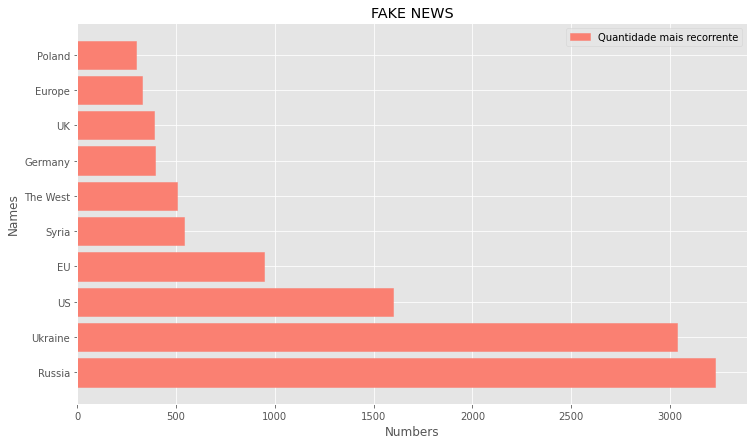

In [ ]:
plot_grafic(df_count_names['Count'], countries_name)

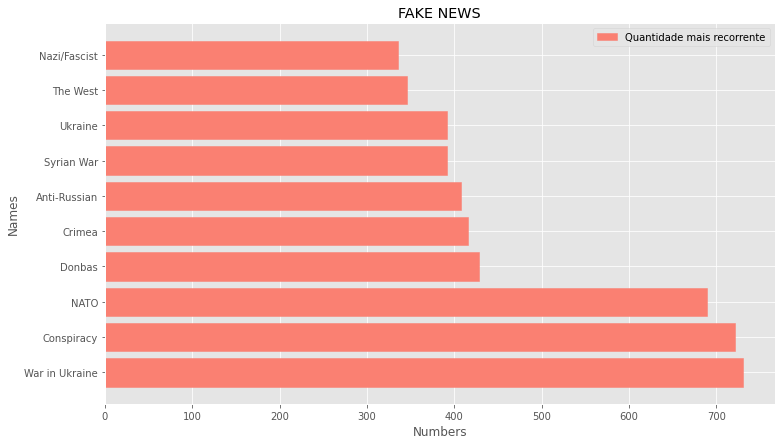

In [ ]:
plot_grafic(df_count_names['Count'], keywords_name)

## **Transformar em dicionário com as chaves sendo as IDs**

####obs: essa etapa não está sendo utilizada no momento

### função set evita que hajam repetições de elementos, colocando no conjunto apenas um único elemento

## Dicionário de países:

In [ ]:
dict_countries= dict([(i,[a]) for i, a in set(zip(countries_id, countries_name))])
dict_countries

{'/countries/1': ['Qatar'],
 '/countries/10': ['West'],
 '/countries/100': ['Switzerland'],
 '/countries/101': ['Luxembourg'],
 '/countries/102': ['FYROM'],
 '/countries/103': ['Dominican Republic'],
 '/countries/104': ['Mongolia'],
 '/countries/105': ['India'],
 '/countries/106': ['South Korea'],
 '/countries/107': ['Ireland'],
 '/countries/108': ['Cyprus'],
 '/countries/109': ['CEE'],
 '/countries/11': ['The West'],
 '/countries/110': ['SEE'],
 '/countries/111': ['Chechnya'],
 '/countries/112': ['Sudan'],
 '/countries/113': ['Islam'],
 '/countries/115': ['Yemen'],
 '/countries/116': ['David Icke'],
 '/countries/117': ['Al-Qaeda'],
 '/countries/118': ['Daesh'],
 '/countries/119': ['Mali'],
 '/countries/12': ['Montenegro'],
 '/countries/13': ['Europe'],
 '/countries/14': ['EU'],
 '/countries/15': ['The Netherlands'],
 '/countries/17': ['Syria'],
 '/countries/18': ['Turkey'],
 '/countries/19': ['Italy'],
 '/countries/2': ['Iran'],
 '/countries/20': ['Estonia'],
 '/countries/21': ['North

##Dicionário de keywords:

In [ ]:
dict_keywords = dict([(i,[a]) for i, a in set(zip(keywords_id, keywords_name))])
dict_keywords

{'/keywords/1': ['fake news'],
 '/keywords/10': ['Terrorism'],
 '/keywords/100': ['Euromaidan'],
 '/keywords/101': ['Coup'],
 '/keywords/102': ['Occupation'],
 '/keywords/103': ['Minsk agreements'],
 '/keywords/104': ['Kerch'],
 '/keywords/105': ['Military'],
 '/keywords/106': ['Petro Poroshenko'],
 '/keywords/107': ['Encircling Russia'],
 '/keywords/108': ['Secret elites / global elites'],
 '/keywords/109': ['George Soros'],
 '/keywords/11': ['Crimea'],
 '/keywords/110': ['false flag'],
 '/keywords/111': ['Donald Trump'],
 '/keywords/112': ['Zelimkhan Khangoshvili'],
 '/keywords/113': ['Idlib'],
 '/keywords/114': ['election meddling'],
 '/keywords/115': ['Manipulated elections/referendum'],
 '/keywords/116': ['Elections'],
 '/keywords/117': ['Robert Mueller'],
 '/keywords/118': ['Destabilising Russia'],
 '/keywords/119': ['Civil war'],
 '/keywords/12': ['Middle East'],
 '/keywords/120': ['INF Treaty'],
 '/keywords/121': ['NGO'],
 '/keywords/122': ['Referendum'],
 '/keywords/123': ['Az

## Etapa gráfica:

Função Counter - contar a incidência de países.

Sorted - colocar em ordem alfabética as keys.

In [ ]:
keywords = Counter(keywords_name)
sorted(keywords, key=keywords.get)
keywords

Counter({'9/11': 7,
         'AA/DCFTA': 44,
         'Abandoned Ukraine': 50,
         'Abkhazia': 11,
         'Abu Bakr al-Baghdadi': 7,
         'Adolf Hitler': 64,
         'AfD': 5,
         'Africa': 20,
         'Aggression': 7,
         'Al Jazeera': 6,
         'Al-Qaeda': 33,
         'Aleksey Dovbash': 3,
         'Aleppo': 29,
         'Alexander Hug': 3,
         'Alexander Khudilaynen': 1,
         'Alexander Litvinenko': 13,
         'Alexander Lukashenko': 10,
         'Alexandrov choir': 1,
         'Alexei Kudrin': 1,
         'Alexei Navalny': 7,
         'Amesbury poisoning': 9,
         'Amnesty International': 6,
         'Andrej Babiš': 1,
         'Andrej Kiska': 3,
         'Andriy Parubiy': 2,
         'Andrzej Duda': 2,
         'Angela Merkel': 74,
         'Anglo-Saxon': 11,
         'Anna Politkovskaya': 3,
         'Anna Soroka': 1,
         'Annexation': 1,
         'Anti-Russian': 408,
         'Anti-Semitism': 16,
         'António Guterres': 1,
     

## Próximos passos: 

Encontrar uma maneira de limitar numericamente a exibição das keywords;

Limitar o gráfico de países, porém, por região onde estão localizados.

# **Fazer um split e retirar as stopwords:**

In [ ]:
files.reset_index(inplace=True)
files.head(1)

,index,claims_id,claim_datetime,claim_first,review_id,review_resume,review_datetime,review_title,review_conclusion,issue_id,news_keyword_id,news_keyword,news_countrys_id,news_countrys,claims_total,news_type,news_url,news_organization_id,news_url_archive,news_part,review_start_time,review_end_time,news_organization_id,news_organization_location,news_organization,news_logo_id,news_logo_type,news_logo_url,news_language_id,news_language,news_language_code,count
0,0,/claims/100,2019-12-13T00:00:00+00:00,/news_articles/598,/claim_reviews/100,Ukraine has put itself in a situation when ext...,2019-12-16T00:00:00+00:00,Normandy summit results: the EU plays on Russi...,This article misrepresents the actual German a...,/issues/177,"[/keywords/61, /keywords/76, /keywords/77, /ke...","[Abandoned Ukraine, Angela Merkel, Emmanuel Ma...","[/countries/4, /countries/9, /countries/11, /c...","[Russia, Ukraine, The West, EU, Germany, France]","['/claims/75', '/claims/79', '/claims/80', '/c...",http://schema.org/NewsArticle,https://sputnik.by/columnists/20191213/1043442...,/organizations/262,https://web.archive.org/web/20191213153206/htt...,"На нынешней же встрече Зеленский (который, кст...",NaN,NaN,/organizations/262,/countries/55,sputnik.by // lifenews.ru,/image_objects/23,http://schema.org/ImageObject,https://api.veedoo.io/images/5e3150bc27830_2fd...,/languages/3,Russian,rus,7


In [ ]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

#função para retirar as stopwords
#faz-se primeiro uma lista vazia para inserir as palavras que não são stopwords
#percorre a lista e preenche com as palavras sem stopwords, retorna cada palavra em uma lista de palavras que vai ser usada para o plot do gráfico.
def remove_stopwords(word_list):
        text_garbage = ['\r', '\n', "he\xa0", "»", "«", "''", ",", ".", '"', "?", ":"]
        for i in text_garbage:
          word_list = word_list.replace(str(i), '')

        word_list = word_list.lower()
        sentences = []
        sentences = nltk.sent_tokenize(word_list)
        for i in range(len(sentences)):
            words = nltk.word_tokenize(sentences[i])
            newwords = [word for word in words if word not in stopwords.words('english')]
            #sentences[i] = ' '.join(newwords)
        return newwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
list_words = []
for index, row in files.iterrows():
  list_words.append(remove_stopwords(str(row['review_resume'])))

In [ ]:
grafic_words = list_words
grafic_words

[['ukraine',
  'put',
  'situation',
  'external',
  'forces',
  'dictate',
  'solve',
  'internal',
  'problems',
  'kyiv',
  'expected',
  'western',
  'allies',
  'put',
  'pressure',
  'russia',
  'normandy',
  'four',
  'format',
  'however',
  'allies',
  'realised',
  'confrontation',
  'russia',
  'cost',
  'emmanuel',
  'macron',
  'angela',
  'merkel',
  'supported',
  'russia',
  "'s",
  'position',
  'put',
  'even',
  'bigger',
  'pressure',
  'ukraine',
  'vladimir',
  'putin',
  'eventually',
  'zelenskyy',
  'found',
  'solitude',
  'russia',
  'germany',
  'france',
  'nearly',
  'identical',
  'positions',
  'regarding',
  'resolution',
  'civil',
  'conflict',
  'ukraine',
  'ukrainian',
  'politicians',
  'wrongfully',
  'remain',
  'confident',
  'west',
  'always',
  'unconditionally',
  'support',
  'russophobic',
  'regime',
  'ukraine',
  'carry',
  'foreign',
  'policy',
  'security',
  'west',
  "'s",
  'authority',
  'enjoy',
  'protectionukraine',
  'could'

### Plotar o gráfico das palavras corridas no resumo:

In [ ]:
words = Counter(grafic_words)
sorted(keywords, key=keywords.get)
words